# Credit Card Fraud Detection

### Importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv("creditcard.csv")
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214804,139828.0,2.101790,0.620181,-2.669859,0.595129,0.956859,-1.365729,0.407762,-0.403228,0.453760,...,0.056062,0.403919,-0.148900,-0.911090,0.382023,-0.058342,0.023708,0.001718,1.00,0
130173,79299.0,1.246104,-0.418749,0.890654,-0.715551,-1.296848,-0.848460,-0.638311,0.021775,1.968114,...,-0.023457,0.135008,-0.023981,0.382987,0.467341,-0.683355,0.087313,0.033218,1.00,0
263101,160801.0,-1.126266,0.267463,1.031407,0.577753,-0.352891,-0.208779,0.624928,0.126328,0.236470,...,0.370759,1.164903,-0.124642,0.064684,-0.343225,-0.604660,-0.139752,-0.115877,140.55,0
178138,123493.0,1.467336,-1.026424,-0.244635,3.279221,1.241119,5.858790,-1.881776,1.586412,0.871167,...,0.172873,0.520521,0.104863,0.716630,-0.337624,0.090441,0.078655,0.000297,151.33,0
9740,14479.0,1.138423,-0.246513,0.681424,0.109786,-0.529931,0.136021,-0.655999,0.150610,1.631222,...,-0.005358,0.147978,-0.047865,-0.302421,0.108604,1.063894,-0.087574,-0.008941,39.00,0
264616,161507.0,-4.991012,-8.123973,-0.488420,1.380928,3.678757,-3.013231,-1.705088,0.478439,1.192231,...,1.048221,0.059484,3.256358,-0.678714,-1.773696,-1.126343,-0.025435,0.546884,720.96,0
45123,42215.0,1.305764,-0.568325,0.216210,0.384984,-0.354439,1.018285,-0.822886,0.366769,-0.463894,...,-0.461056,-0.666582,-0.123990,-1.217923,0.595378,-0.206397,0.068405,-0.001676,2.00,0
246135,153046.0,-0.822587,1.580752,-1.312084,-1.083085,0.557945,-1.821622,1.236963,0.048837,0.041468,...,0.215467,0.771177,-0.140354,-0.009650,-0.246821,0.108174,0.473410,0.327966,3.84,0
101635,67898.0,-0.080982,-1.162082,1.520677,-1.766849,-0.697216,0.214974,-1.229471,0.561041,0.683841,...,0.531861,1.738611,0.399855,0.050488,-2.189966,-0.762738,0.425441,0.362860,3.00,0
278796,168438.0,-1.249116,0.130666,-0.516109,1.367245,1.043562,-1.093620,1.084774,0.061628,-1.074625,...,0.372240,0.634263,0.024978,-0.045905,0.065529,-0.403098,0.051048,-0.023581,135.64,0


### EDA analysis

In [3]:
#checking for null values
pd.set_option('max_rows', 100)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df["Amount"].describe().T

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


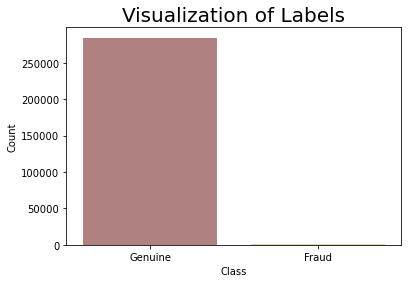

In [12]:
import seaborn as sns
labels = ["Genuine", "Fraud"]
sns.countplot(df['Class'], palette = 'pink')
plt.title("Visualization of Labels", fontsize = 20)
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
scaler = MinMaxScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

y = df["Class"]
X = df.drop(["Class"], axis= 1)

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


### Here 0 and 1 counts are varying, So we should perform minority sampling using SMOTE for better score 

In [19]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [20]:
y_test.value_counts()

0    85307
1      136
Name: Class, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)

### Now we can see, all the values are equal 

In [22]:
y_sm.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [27]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_sm, y_sm, test_size= 0.3, stratify=y_sm ,random_state= 42)

print("1. Shape of train_X: ", X_train1.shape)
print("2. Shape of test_X: ", X_test1.shape)
print("3. Value counts of y_test\n", y_test1.value_counts())
print("4. Value counts of y_train\n",y_train1.value_counts())

1. Shape of train_X:  (398041, 29)
2. Shape of test_X:  (170589, 29)
3. Value counts of y_test
 0    85295
1    85294
Name: Class, dtype: int64
4. Value counts of y_train
 1    199021
0    199020
Name: Class, dtype: int64


### Decision Tree Classifier

In [28]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, y_train1)

predictions_dt = decision_tree.predict(X_test1)
decision_tree_score = decision_tree.score(X_test1, y_test1) * 100
print(decision_tree_score)

99.79775952728488


### Random Forest

In [29]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train1, y_train1)

predictions_rf = random_forest.predict(X_test1)
random_forest_score = random_forest.score(X_test1, y_test1) * 100
print(random_forest_score)

99.98475868901278


### Confusion Matrix for Decision Tree

Text(69.0, 0.5, 'Truth')

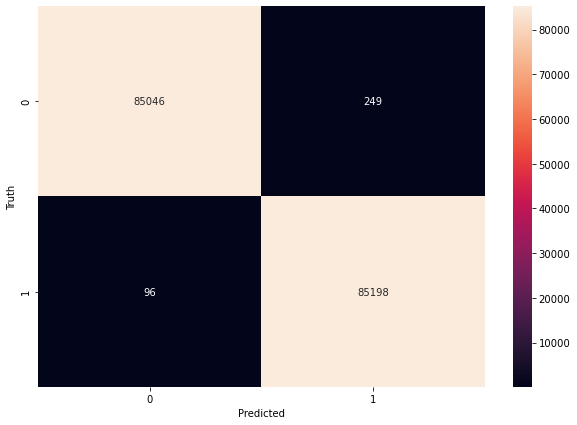

In [31]:
import seaborn as sns
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test1,predictions=predictions_dt.round())

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Confusion Matrix for Random Forest

Text(69.0, 0.5, 'Truth')

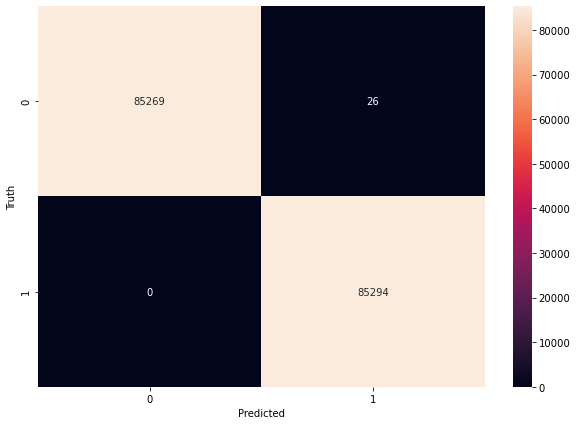

In [32]:
cm = tf.math.confusion_matrix(labels=y_test1,predictions=predictions_rf.round())

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [34]:
print("Evaluation of Decision Tree Model")
print()
metrics(y_test1, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99798
Precision: 0.99709
Recall: 0.99887
F1-score: 0.99798


In [35]:
print("Evaluation of Random Forest Model")
print()
metrics(y_test1, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99985
Precision: 0.99970
Recall: 1.00000
F1-score: 0.99985


In [36]:
print(classification_report(y_test1,predictions_dt.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [37]:
print(classification_report(y_test1,predictions_rf.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

